In [1]:
import gc
import pandas as pd
import numpy as np 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.model_selection import train_test_split
# 相关全局设置
pd.set_option('display.max_columns', None)
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("./genrate_data/data_B.csv")

In [3]:
df_test = data[data["related"].isnull() == True].copy().reset_index(drop=True)
df_train = data[~data["related"].isnull() == True].copy().reset_index(drop=True)

In [6]:
count_0 = np.sum(df_train["related"] == 0)
count_1 = np.sum(df_train["related"] == 1)
print(count_0 / count_1)

9.052949109234154


## 重要特征
之前的操作见博客，此处研究重要特征"disease", "food", "N_33", "N_74", "N_198"

### 0-1分布

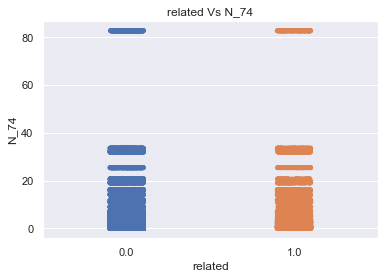

In [14]:
sns.stripplot(df_train["related"], df_train["N_74"], jitter=True, data=df_train)
plt.title("related Vs N_74");

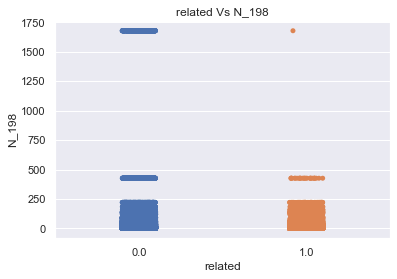

In [15]:
sns.stripplot(df_train["related"], df_train["N_198"], jitter=True, data=df_train)
plt.title("related Vs N_198");

### 概率密度图

#### N_33

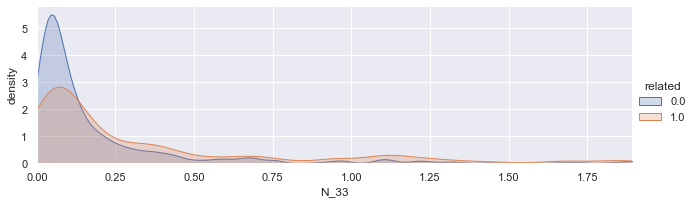

In [4]:
# 概率密度图
facet = sns.FacetGrid(df_train, hue="related", aspect=3)
facet.map(sns.kdeplot, 'N_33', shade= True)
facet.set(xlim=(0, df_train['N_33'].max()))
facet.add_legend()
plt.xlabel('N_33') 
plt.ylabel('density')
plt.show();
# 数据发现：数据中N_33是一个连续型变量，无法直接统计 related 的概率，故先展示N_33的概率密度，以及每个值下的 0 和 1 的分布比较。
# 不难发现，N_33的值在0~0.125这个部分的0 1 分布区别很大，密度图非交叉区域面积非常大。
# 数据启示：可视化中的交叉部分说明N_33和related其实并不是严格的线性关系，数据处理中或许考虑把N_33的值分为三段：0~0.125为一段 0.125~1.25 1.25~max

#### N_74

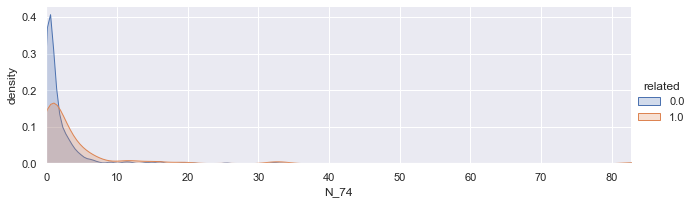

In [5]:
# 概率密度图
facet = sns.FacetGrid(df_train, hue="related", aspect=3)
facet.map(sns.kdeplot, 'N_74', shade= True)
facet.set(xlim=(0, df_train['N_74'].max()))
facet.add_legend()
plt.xlabel('N_74') 
plt.ylabel('density')
plt.show();
# 数据启示：0~2 2~10 10~max

#### disease

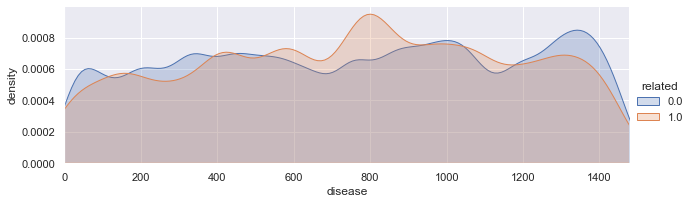

In [6]:
# 概率密度图
facet = sns.FacetGrid(df_train, hue="related", aspect=3)
facet.map(sns.kdeplot, 'disease', shade= True)
facet.set(xlim=(0, df_train['disease'].max()))
facet.add_legend()
plt.xlabel('disease') 
plt.ylabel('density')
plt.show();

#### food

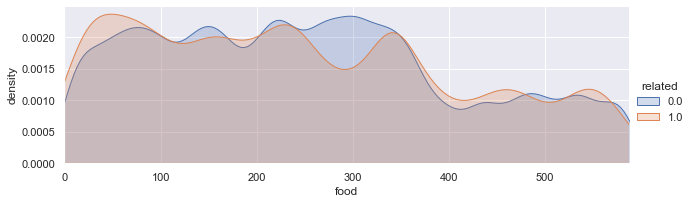

In [7]:
# 概率密度图
facet = sns.FacetGrid(df_train, hue="related", aspect=3)
facet.map(sns.kdeplot, 'food', shade= True)
facet.set(xlim=(0, df_train['food'].max()))
facet.add_legend()
plt.xlabel('food') 
plt.ylabel('density')
plt.show();

#### N_60

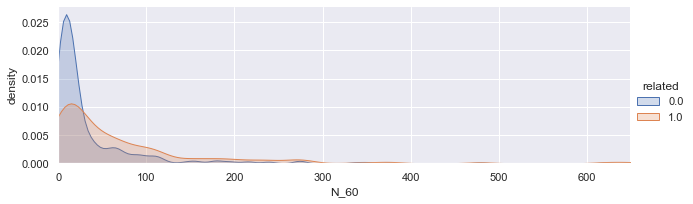

In [8]:
# 概率密度图
facet = sns.FacetGrid(df_train, hue="related", aspect=3)
facet.map(sns.kdeplot, 'N_60', shade= True)
facet.set(xlim=(0, df_train['N_60'].max()))
facet.add_legend()
plt.xlabel('N_60') 
plt.ylabel('density')
plt.show();

#### N_61

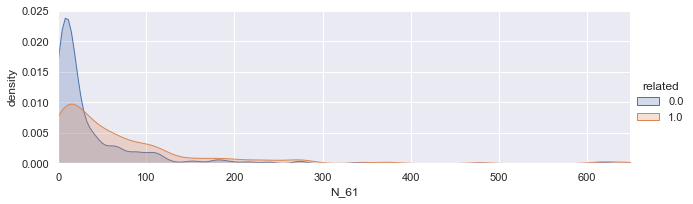

In [8]:
# 概率密度图
facet = sns.FacetGrid(df_train, hue="related", aspect=3)
facet.map(sns.kdeplot, 'N_61', shade= True)
facet.set(xlim=(0, df_train['N_61'].max()))
facet.add_legend()
plt.xlabel('N_61') 
plt.ylabel('density')
plt.show();

#### N_42

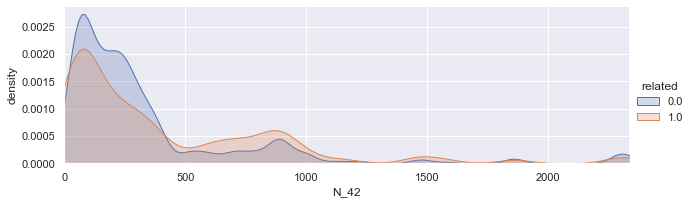

In [9]:
# 概率密度图
facet = sns.FacetGrid(df_train, hue="related", aspect=3)
facet.map(sns.kdeplot, 'N_42', shade= True)
facet.set(xlim=(0, df_train['N_42'].max()))
facet.add_legend()
plt.xlabel('N_42') 
plt.ylabel('density')
plt.show();

#### N_111

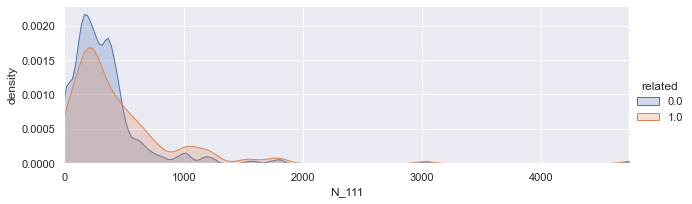

In [7]:
# 概率密度图
facet = sns.FacetGrid(df_train, hue="related", aspect=3)
facet.map(sns.kdeplot, 'N_111', shade= True)
facet.set(xlim=(0, df_train['N_111'].max()))
facet.add_legend()
plt.xlabel('N_111')
plt.ylabel('density')
plt.show();

#### N_209

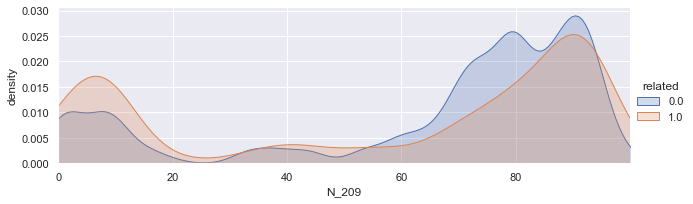

In [10]:
facet = sns.FacetGrid(df_train, hue="related", aspect=3)
facet.map(sns.kdeplot, 'N_209', shade= True)
facet.set(xlim=(0, df_train['N_209'].max()))
facet.add_legend()
plt.xlabel('N_209')
plt.ylabel('density')
plt.show();

#### N_106

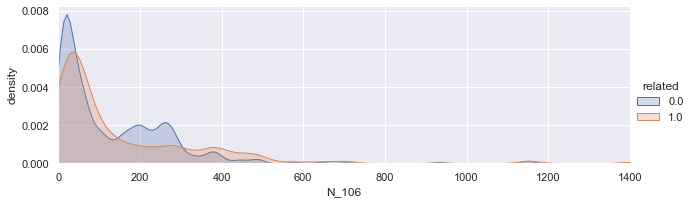

In [6]:
facet = sns.FacetGrid(df_train, hue="related", aspect=3)
facet.map(sns.kdeplot, 'N_106', shade= True)
facet.set(xlim=(0, df_train['N_106'].max()))
facet.add_legend()
plt.xlabel('N_106')
plt.ylabel('density')
plt.show();

#### N_28

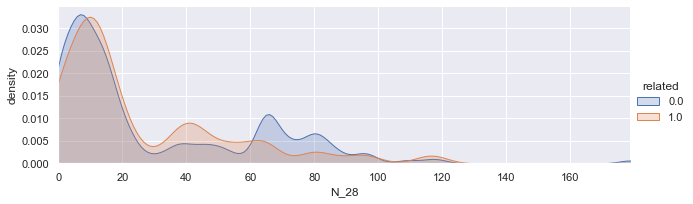

In [23]:
facet = sns.FacetGrid(df_train, hue="related", aspect=3)
facet.map(sns.kdeplot, 'N_28', shade= True)
facet.set(xlim=(0, df_train['N_28'].max())) # 28 198
facet.add_legend()
plt.xlabel('N_28')
plt.ylabel('density')
plt.show();

## 进一步EDA（重要特征）

In [7]:
imp_data = data[["N_14", "N_28", "N_33", "N_42", "N_59", "N_60", "N_61", "N_74", "N_85", "N_106", "N_111", "N_198", "N_209", "disease", "food"]]

In [23]:
topn = ["N_33", "N_42", "N_43", "N_74", "N_106", "N_111", "N_209", "disease", "food"]
for i in range(len(topn)):
    for j in range(i + 1, len(topn)):
        data[f"{topn[i]}+{topn[j]}"] = data[topn[i]] + data[topn[j]]
        data[f"{topn[i]}-{topn[j]}"] = data[topn[i]] - data[topn[j]]
        data[f"{topn[i]}*{topn[j]}"] = data[topn[i]] * data[topn[j]]
        data[f"{topn[i]}/{topn[j]}"] = data[topn[i]] / (data[topn[j]] + 1e-5)

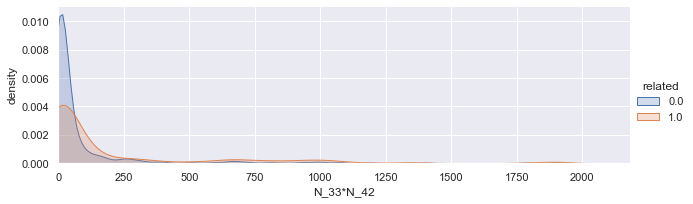

In [27]:
facet = sns.FacetGrid(data, hue="related", aspect=3)
facet.map(sns.kdeplot, 'N_33*N_42', shade= True)
facet.set(xlim=(0, data['N_33*N_42'].max())) # 28 198
facet.add_legend()
plt.xlabel('N_33*N_42')
plt.ylabel('density')
plt.show();

### 重要特征数据描述

In [7]:
# 数据描述
imp_data.head(10).append(imp_data.tail())

,N_28,N_33,N_42,N_60,N_61,N_74,N_85,N_106,N_111,N_198,N_209,disease,food
0,14.4,0.157,23.0,36.0,36.0,0.96,NaN,70.0,79.0,8.2,92.82,861,0
1,14.4,0.157,23.0,36.0,36.0,0.96,NaN,70.0,79.0,8.2,92.82,839,0
2,14.4,0.157,23.0,36.0,36.0,0.96,NaN,70.0,79.0,8.2,92.82,50,0
3,14.4,0.157,23.0,36.0,36.0,0.96,NaN,70.0,79.0,8.2,92.82,1370,0
4,14.4,0.157,23.0,36.0,36.0,0.96,NaN,70.0,79.0,8.2,92.82,1015,0
5,14.4,0.157,23.0,36.0,36.0,0.96,NaN,70.0,79.0,8.2,92.82,128,0
6,14.4,0.157,23.0,36.0,36.0,0.96,NaN,70.0,79.0,8.2,92.82,557,0
7,14.4,0.157,23.0,36.0,36.0,0.96,NaN,70.0,79.0,8.2,92.82,1406,0
8,14.4,0.157,23.0,36.0,36.0,0.96,NaN,70.0,79.0,8.2,92.82,1264,0
9,14.4,0.157,23.0,36.0,36.0,0.96,NaN,70.0,79.0,8.2,92.82,1084,0


In [8]:
# 特征过多不方便展示统计结果
imp_data1 = imp_data[["N_28", "N_33", "N_42", "N_60", "N_61", "N_74"]]
imp_data2 = imp_data[["N_85", "N_106", "N_111", "N_198", "N_209", "disease", "food"]]

In [9]:
imp_data1.describe()

,N_28,N_33,N_42,N_60,N_61,N_74
count,111518.000000,172975.000000,177045.000000,159137.000000,165242.000000,181929.000000
mean,29.887226,0.221234,329.458621,43.938619,48.996493,2.497099
std,36.527011,0.349434,406.525666,84.377183,93.289813,6.419795
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.800000,0.043000,85.500000,7.000000,8.000000,0.300000
50%,14.200000,0.086000,197.000000,15.000000,16.000000,0.800000
75%,50.500000,0.225000,355.000000,43.000000,51.000000,2.290000
max,335.400000,2.858000,2338.000000,649.000000,667.000000,82.710000


In [10]:
imp_data2.describe()

,N_85,N_106,N_111,N_198,N_209,disease,food
count,115588.000000,181115.000000,177045.000000,171347.000000,183150.000000,188848.000000,188848.000000
mean,0.985209,131.546671,346.246230,20.316929,66.240167,756.845209,281.043103
std,4.350434,161.454757,384.437164,88.416011,29.976769,424.749552,167.394936
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.047500,24.000000,150.000000,0.000000,59.170000,397.000000,139.500000
50%,0.181000,66.000000,260.000000,3.200000,78.385000,773.000000,276.500000
75%,0.584000,203.000000,415.000000,17.100000,88.050000,1118.000000,419.500000
max,60.127000,1400.000000,4740.000000,1677.600000,99.930000,1478.000000,590.000000


### KDE图

<AxesSubplot:xlabel='N_14', ylabel='Density'>

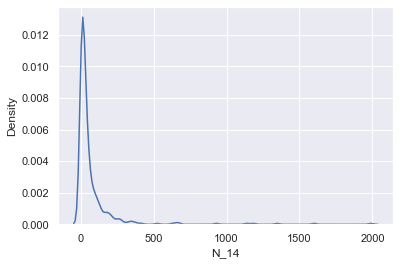

<AxesSubplot:xlabel='N_59', ylabel='Density'>

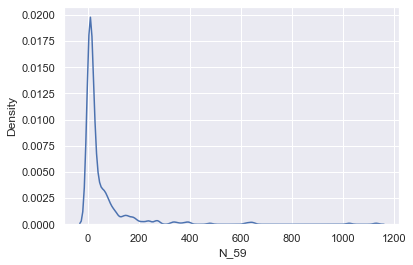

In [8]:
sns.kdeplot(imp_data['N_14'])
plt.show()
sns.kdeplot(imp_data['N_59'])
plt.show()

In [9]:
imp_data["N_14"] = np.log1p(imp_data["N_14"])

<AxesSubplot:xlabel='N_14', ylabel='Density'>

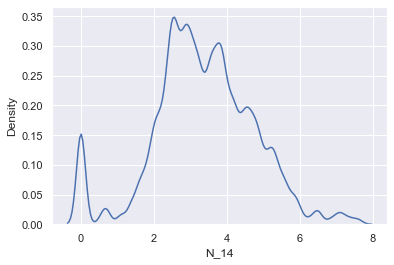

In [10]:
sns.kdeplot(imp_data['N_14'])
plt.show()

In [11]:
imp_data["N_59"] = np.log1p(imp_data["N_59"])

<AxesSubplot:xlabel='N_59', ylabel='Density'>

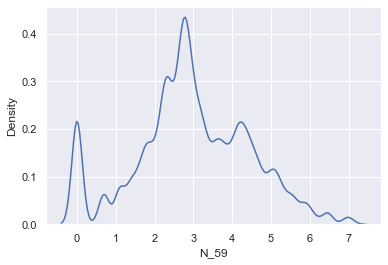

In [12]:
sns.kdeplot(imp_data['N_59'])
plt.show()

In [21]:
imp_data["N_61"] = np.log1p(imp_data["N_61"])

<AxesSubplot:xlabel='N_61', ylabel='Density'>

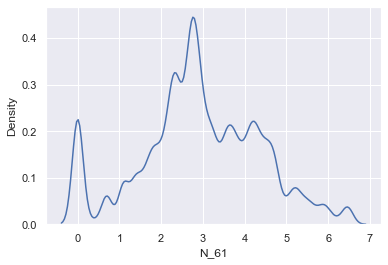

In [22]:
sns.kdeplot(imp_data['N_61'])
plt.show()

In [19]:
imp_data["N_85"] = np.log1p(imp_data["N_85"])

<AxesSubplot:xlabel='N_85', ylabel='Density'>

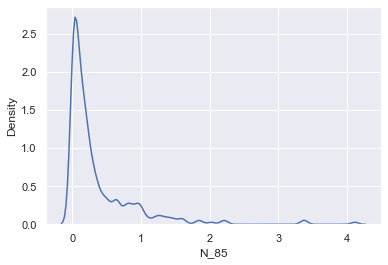

In [20]:
sns.kdeplot(imp_data['N_85'])
plt.show()

<AxesSubplot:xlabel='N_198', ylabel='Density'>

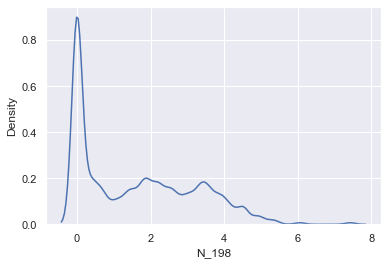

In [16]:
sns.kdeplot(imp_data['N_198'])
plt.show()

<AxesSubplot:xlabel='N_28', ylabel='Density'>

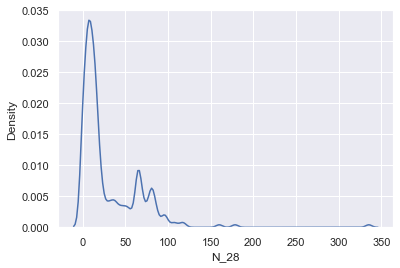

<AxesSubplot:xlabel='N_33', ylabel='Density'>

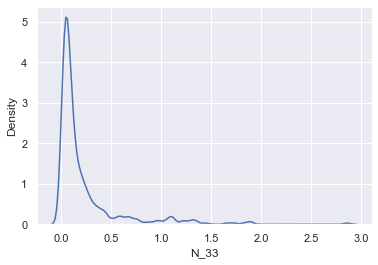

<AxesSubplot:xlabel='N_42', ylabel='Density'>

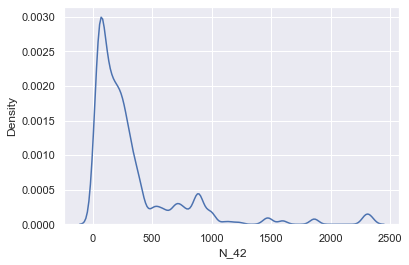

<AxesSubplot:xlabel='N_60', ylabel='Density'>

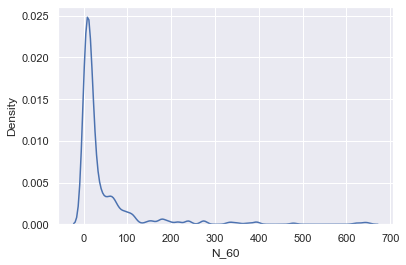

<AxesSubplot:xlabel='N_61', ylabel='Density'>

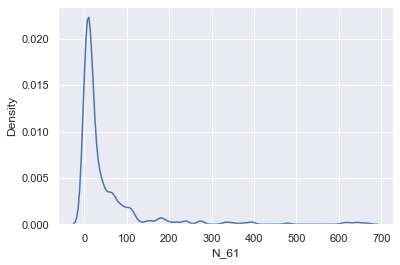

<AxesSubplot:xlabel='N_74', ylabel='Density'>

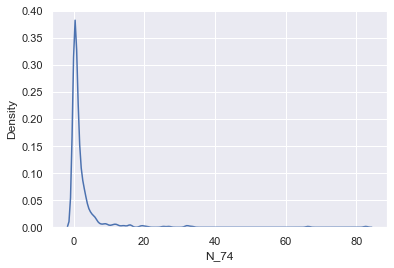

In [16]:
sns.kdeplot(imp_data['N_28'])
plt.show()
sns.kdeplot(imp_data['N_33'])
plt.show()
sns.kdeplot(imp_data['N_42'])
plt.show()
sns.kdeplot(imp_data['N_60'])
plt.show()
sns.kdeplot(imp_data['N_61'])
plt.show()
sns.kdeplot(imp_data['N_74'])
plt.show()
# N_33 N_60需要进行截尾处理

<AxesSubplot:xlabel='N_85', ylabel='Density'>

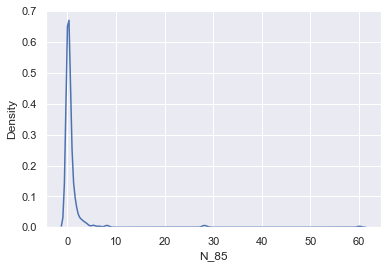

<AxesSubplot:xlabel='N_106', ylabel='Density'>

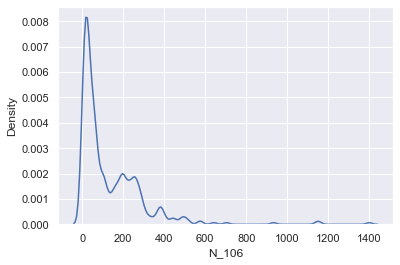

<AxesSubplot:xlabel='N_111', ylabel='Density'>

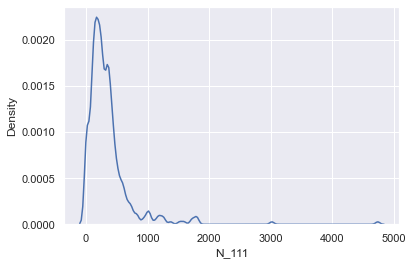

<AxesSubplot:xlabel='N_198', ylabel='Density'>

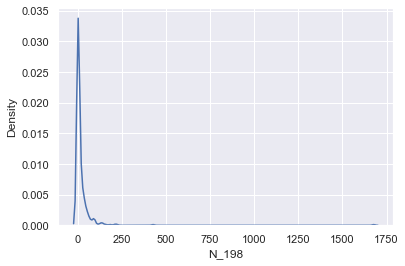

<AxesSubplot:xlabel='N_209', ylabel='Density'>

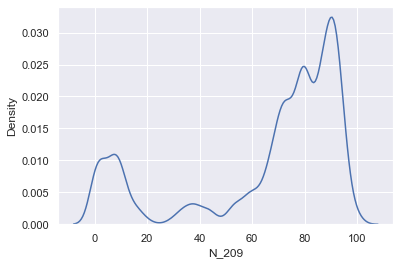

In [22]:
sns.kdeplot(imp_data['N_85'])
plt.show()
sns.kdeplot(imp_data['N_106'])
plt.show()
sns.kdeplot(imp_data['N_111'])
plt.show()
sns.kdeplot(imp_data['N_198'])
plt.show()
sns.kdeplot(imp_data['N_209'])
plt.show()
# N_85 N_198

<AxesSubplot:xlabel='N_204', ylabel='Density'>

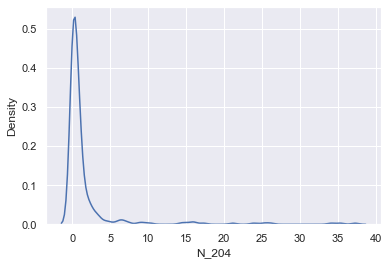

<AxesSubplot:xlabel='N_146', ylabel='Density'>

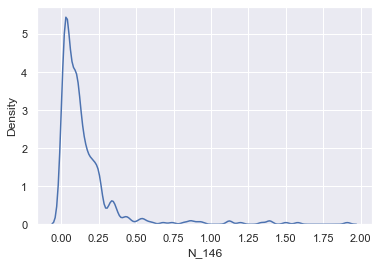

<AxesSubplot:xlabel='N_49', ylabel='Density'>

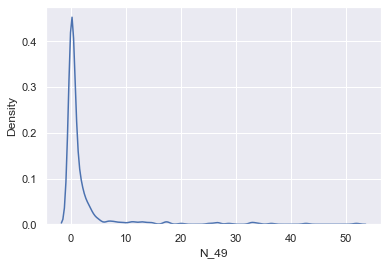

<AxesSubplot:xlabel='N_197', ylabel='Density'>

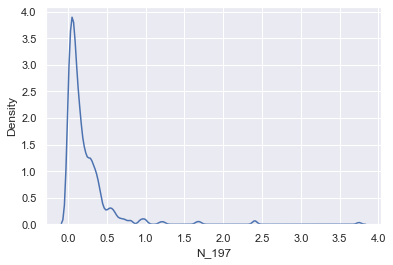

<AxesSubplot:xlabel='N_195', ylabel='Density'>

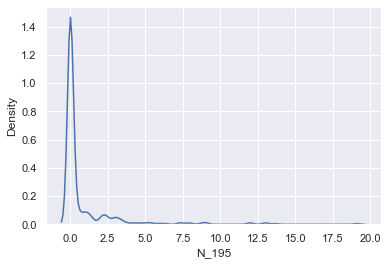

<AxesSubplot:xlabel='N_20', ylabel='Density'>

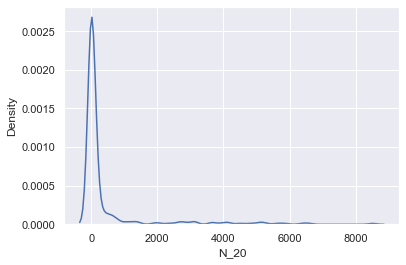

In [30]:
sns.kdeplot(data['N_204'])
plt.show()
sns.kdeplot(data['N_146'])
plt.show()
sns.kdeplot(data['N_49'])
plt.show()

sns.kdeplot(data['N_197'])
plt.show()
sns.kdeplot(data['N_195'])
plt.show()
sns.kdeplot(data['N_20'])
plt.show()

<AxesSubplot:xlabel='N33_seg', ylabel='related'>

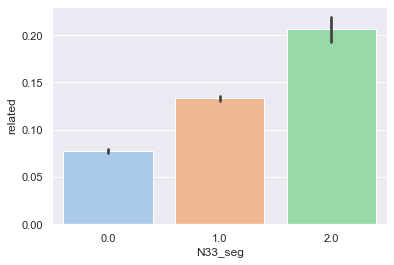

In [29]:
sns.barplot(x="N33_seg", y="related", data = df_train, palette='pastel')

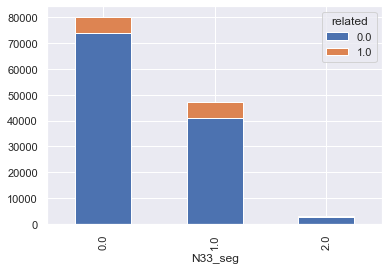

In [58]:
hourDF = df_train.groupby(['N33_seg', 'related'])['N_33'].count().unstack('related').fillna(0)
hourDF[[0,1]].plot(kind='bar', stacked=True);

In [43]:
# N_43
def get_N_43_seg(x):
    if x >=0 and x <= 20:
        return 1
    elif x > 20 and x <= 38:
        return 2
    elif x > 38 and x <= 50:
        return 3
    elif x > 50 and x <= np.max(df_train["N_43"]):
        return 4
df_train["N43_seg"] = df_train["N_43"].apply(lambda x: get_N_43_seg(x))

<AxesSubplot:xlabel='N43_seg', ylabel='related'>

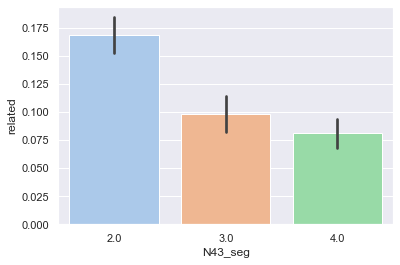

In [44]:
sns.barplot(x="N43_seg", y="related", data = df_train, palette='pastel')

                                            Plots for N_33                                            


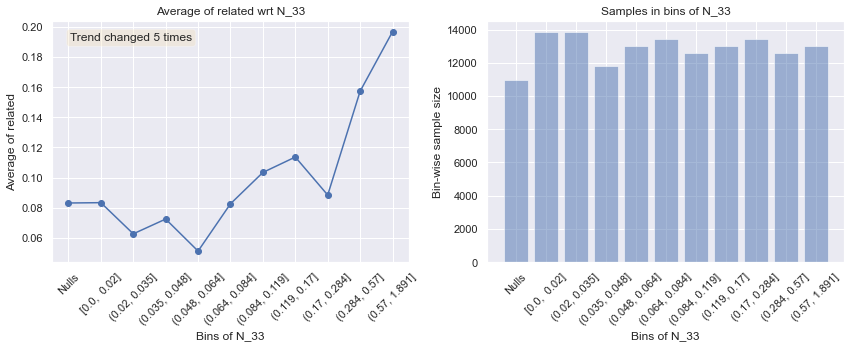

--------------------------------------------------------------------------------------------------------------




In [31]:
from featexp import get_univariate_plots

# Plots drawn for all features if nothing is passed in feature_list parameter.
get_univariate_plots(data=df_train, target_col='related', 
                     features_list=['N_33'], bins=10)